In [43]:
### Importing relevant libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS
import json
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [62]:
DATASET_LOC = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/dataset.csv"
df = pd.read_csv(DATASET_LOC)
df.head()

id           created_on                                              title  \
0   6  2020-02-20 06:43:18  Comparison between YOLO and RCNN on real world...   
1   7  2020-02-20 06:47:21  Show, Infer & Tell: Contextual Inference for C...   
2   9  2020-02-24 16:24:45                       Awesome Graph Classification   
3  15  2020-02-28 23:55:26                    Awesome Monte Carlo Tree Search   
4  25  2020-03-07 23:04:31                                      AttentionWalk   

                                         description              tag  
0  Bringing theory to experiment is cool. We can ...  computer-vision  
1  The beauty of the work lies in the way it arch...  computer-vision  
2  A collection of important graph embedding, cla...            other  
3  A curated list of Monte Carlo tree search pape...            other  
4  A PyTorch Implementation of "Watch Your Step: ...            other

In [63]:
df.tag.value_counts()

tag
natural-language-processing    310
computer-vision                285
other                          106
mlops                           63
Name: count, dtype: int64

In [64]:
### Creating stratified sampling, so that the data splits have similar class distributions

test_size=0.2
train_df, val_df = train_test_split(df, stratify=df.tag, test_size=test_size, random_state=123)

In [65]:
train_df.tag.value_counts(ascending=True)

tag
mlops                           50
other                           85
computer-vision                228
natural-language-processing    248
Name: count, dtype: int64

In [66]:
val_df.tag.value_counts()

tag
natural-language-processing    62
computer-vision                57
other                          21
mlops                          13
Name: count, dtype: int64

### EDA

In [67]:
### Most common tags
all_tags = Counter(df.tag)
all_tags.most_common()

[('natural-language-processing', 310),
 ('computer-vision', 285),
 ('other', 106),
 ('mlops', 63)]

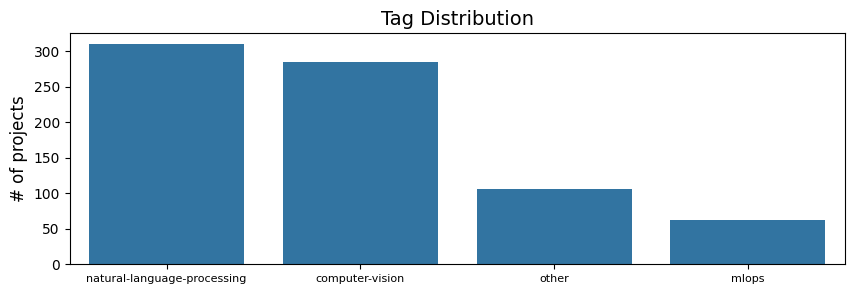

In [68]:
tags, tag_counts = zip(*all_tags.most_common())
plt.figure(figsize=(10,3))
ax = sns.barplot(x=list(tags), y=list(tag_counts))
ax.set_xticklabels(tags, rotation=0, fontsize=8)
plt.title("Tag Distribution", fontsize=14)
plt.ylabel("# of projects", fontsize=12)
plt.show()

In [69]:
### WordCloud

def wordcloud(tag):
    tag = tag
    subset = df[df.tag==tag]
    text = subset.title.values
    cloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', collocations=False, width = 500, height=300).generate(" ".join(text))
    return cloud 

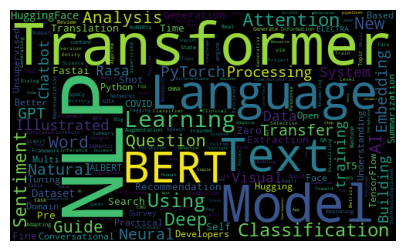

In [70]:
### Wordcloud for natural language processing

cloud = wordcloud("natural-language-processing")
plt.figure(figsize=(10,3))    
plt.axis('off')
plt.imshow(cloud)

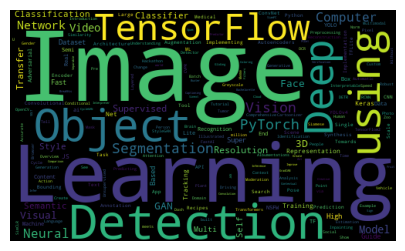

In [71]:
### Wordcloud for computer vision

cloud = wordcloud("computer-vision")
plt.figure(figsize=(10,3))    
plt.axis('off')
plt.imshow(cloud)

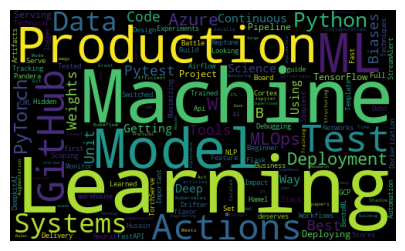

In [72]:
### Wordcloud for mlops

cloud = wordcloud("mlops")
plt.figure(figsize=(10,3))    
plt.axis('off')
plt.imshow(cloud)

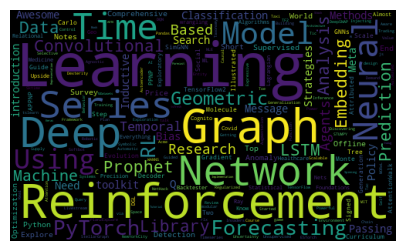

In [73]:
### Wordcloud for other

cloud = wordcloud("other")
plt.figure(figsize=(10,3))    
plt.axis('off')
plt.imshow(cloud)

#### Feature Engineering

In [74]:
df.head()

id           created_on                                              title  \
0   6  2020-02-20 06:43:18  Comparison between YOLO and RCNN on real world...   
1   7  2020-02-20 06:47:21  Show, Infer & Tell: Contextual Inference for C...   
2   9  2020-02-24 16:24:45                       Awesome Graph Classification   
3  15  2020-02-28 23:55:26                    Awesome Monte Carlo Tree Search   
4  25  2020-03-07 23:04:31                                      AttentionWalk   

                                         description              tag  
0  Bringing theory to experiment is cool. We can ...  computer-vision  
1  The beauty of the work lies in the way it arch...  computer-vision  
2  A collection of important graph embedding, cla...            other  
3  A curated list of Monte Carlo tree search pape...            other  
4  A PyTorch Implementation of "Watch Your Step: ...            other

In [75]:
df['text'] = df.title + " " +df.description

In [76]:
nltk.download('stopwords')
STOPWORDS = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amaltom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
def clean_text(text, stopwords=STOPWORDS):
    """Clean raw text string"""
    # Lower 
    text = text.lower()

    # Remove stopwords
    pattern = re.compile(r"\b(" + r"|".join(stopwords) + r")\b\s*" )
    text = pattern.sub('', text)

    # Spacing and filters
    text = re.sub(r"([!\"'#$%&()*\+,-./:;<=>?@\\\[\]^_`{|}~])", r" \1 ", text)
    text = re.sub("[^A-Za-z0-9]+", " ", text)
    text = re.sub(" +", " ", text)
    text = text.strip()
    text = re.sub(r"http\S+", "", text)

    return text

In [78]:
original_df = df.copy()
df['text_new'] = df.text.apply(clean_text)
print (f"{original_df.text.values[0]}\n{df.text.values[0]}")

Comparison between YOLO and RCNN on real world videos Bringing theory to experiment is cool. We can easily train models in colab and find the results in minutes.
Comparison between YOLO and RCNN on real world videos Bringing theory to experiment is cool. We can easily train models in colab and find the results in minutes.


In [79]:
df.head()

id           created_on                                              title  \
0   6  2020-02-20 06:43:18  Comparison between YOLO and RCNN on real world...   
1   7  2020-02-20 06:47:21  Show, Infer & Tell: Contextual Inference for C...   
2   9  2020-02-24 16:24:45                       Awesome Graph Classification   
3  15  2020-02-28 23:55:26                    Awesome Monte Carlo Tree Search   
4  25  2020-03-07 23:04:31                                      AttentionWalk   

                                         description              tag  \
0  Bringing theory to experiment is cool. We can ...  computer-vision   
1  The beauty of the work lies in the way it arch...  computer-vision   
2  A collection of important graph embedding, cla...            other   
3  A curated list of Monte Carlo tree search pape...            other   
4  A PyTorch Implementation of "Watch Your Step: ...            other   

                                                text  \
0  Comparison between YOLO and RCNN on real world...   
1  Show, Infer & Tell: Contextual Inference for C...   
2  Awesome Graph Classification A collection of i...   
3  Awesome Monte Carlo Tree Search A curated list...   
4  AttentionWalk A PyTorch Implementation of "Wat...   

                                            text_new  
0  comparison yolo rcnn real world videos bringin...  
1  show infer tell contextual inference creative ...  
2  awesome graph classification collection import...  
3  awesome monte carlo tree search curated list m...  
4  attentionwalk pytorch implementation watch ste...

In [81]:
df.iloc[0]['title']

'Comparison between YOLO and RCNN on real world videos'

In [82]:
df.iloc[0]['description']

'Bringing theory to experiment is cool. We can easily train models in colab and find the results in minutes.'

In [83]:
df.iloc[0]['text']

'Comparison between YOLO and RCNN on real world videos Bringing theory to experiment is cool. We can easily train models in colab and find the results in minutes.'